<a href="https://colab.research.google.com/github/bieri2/ATMS-597-Project-4-Wx-Prediction/blob/master/GroupE_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Read in data

In [2]:
datapath = "./dataset/"

In [21]:
all_daily_data = pd.read_csv(datapath+'all_data_daily.csv', index_col = 'Timestamp')
all_3hr_data   = pd.read_csv(datapath+'all_data_3hr.csv', index_col = 'Timestamp')

In [22]:
display(all_3hr_data.head(20))

DWPC    HCLD   LCLD  MCLD  PRCP    PRES   TMPC  UWND  \
Timestamp                                                                     
2010-01-02 06:00:00 -13.740     0.0  100.0   1.0  0.00  1000.0 -11.26  4.30   
2010-01-02 09:00:00 -15.190     0.0  100.0   0.0  0.04  1000.4 -12.66  4.90   
2010-01-02 12:00:00 -17.910     0.0  100.0   0.0  0.01  1000.7 -14.76  4.20   
2010-01-02 15:00:00 -20.070     0.0    8.0   0.0  0.00  1002.0 -15.76  4.30   
2010-01-02 18:00:00 -18.810     0.0    2.0   0.0  0.00  1001.3 -13.86  4.60   
2010-01-02 21:00:00 -17.790     0.0    2.0   0.0  0.00   999.8 -13.36  3.60   
2010-01-03 00:00:00 -18.550     0.0    2.0   0.0  0.00  1000.6 -15.26  2.10   
2010-01-03 03:00:00 -19.360     0.0    4.0   0.0  0.00  1000.9 -16.06  2.10   
2010-01-03 06:00:00 -19.030     0.0    3.0   0.0  0.00  1001.3 -15.91  1.75   
2010-01-03 09:00:00 -18.540     1.0    4.0   0.0  0.00  1001.7 -15.76  2.20   
2010-01-03 12:00:00 -18.810     9.0    6.0   0.0  0.00  1001.6 -15.96  2.50   
2010-01-03 15:00:00 -18.410    42.0    7.0   1.0  0.00  1001.6 -14.76  1.50   
2010-01-03 18:00:00 -15.090     6.0    5.0   1.0  0.00  1000.5 -10.66  2.10   
2010-01-03 21:00:00 -14.210     1.0    6.0   0.0  0.00   999.9 -10.16  3.60   
2010-01-04 00:00:00 -15.610 -9999.0    0.0   0.0  0.00   999.9 -12.96  2.60   
2010-01-04 03:00:00 -16.710     0.0    0.0   0.0  0.00   999.9 -13.86  2.40   
2010-01-04 06:00:00 -16.175     0.0    6.0   0.0  0.00   999.5 -13.96  2.90   
2010-01-04 09:00:00 -15.940     0.0    8.0   0.0  0.00   999.5 -14.06  3.40   
2010-01-04 12:00:00 -16.270     0.0    6.0   0.0  0.00   999.3 -14.36  3.90   
2010-01-04 15:00:00 -15.940     1.0   13.0   1.0  0.00   999.1 -13.46  4.00   

                     VWND      WSPD  ...    UWND700    UWND500     UWND250  \
Timestamp                            ...                                     
2010-01-02 06:00:00  -5.4  6.902898  ...  17.668810  51.474499   80.039564   
2010-01-02 09:00:00  -5.3  7.218033  ...  19.953202  54.090614   85.232987   
2010-01-02 12:00:00  -6.0  7.323933  ...  23.339134  49.456141  108.057921   
2010-01-02 15:00:00  -4.5  6.224147  ...  22.274664  47.883198  110.935526   
2010-01-02 18:00:00  -4.0  6.095900  ...  25.075511  50.553670  108.431700   
2010-01-02 21:00:00  -5.0  6.161169  ...  28.752876  51.074546  102.724226   
2010-01-03 00:00:00  -4.8  5.239275  ...  30.469412  49.973547   87.055583   
2010-01-03 03:00:00  -4.1  4.606517  ...  24.840823  46.670103   75.194994   
2010-01-03 06:00:00  -3.0  3.483309  ...  22.857393  44.708590   75.265474   
2010-01-03 09:00:00  -2.5  3.330165  ...  25.258067  41.869332   70.410760   
2010-01-03 12:00:00  -3.0  3.905125  ...  18.503283  37.022572   54.027080   
2010-01-03 15:00:00  -3.9  4.178516  ...  13.097394  33.885393   41.325452   
2010-01-03 18:00:00  -2.9  3.580503  ...  12.964943  30.736956   33.458034   
2010-01-03 21:00:00  -3.0  4.686150  ...   9.756531  28.443411   30.897104   
2010-01-04 00:00:00  -3.9  4.687217  ...   7.131532  29.968958   26.360814   
2010-01-04 03:00:00  -3.7  4.410215  ...   4.517203  29.760959   23.705177   
2010-01-04 06:00:00  -3.5  4.547938  ...   5.506813  24.348398   25.763683   
2010-01-04 09:00:00  -3.5  4.879549  ...   8.426034  20.199498   25.333597   
2010-01-04 12:00:00  -3.7  5.375872  ...   9.501372  13.094221   18.122794   
2010-01-04 15:00:00  -4.3  5.872819  ...   7.930635  -5.387929   11.166288   

                       UWND100    VWND925    VWND850    VWND700    VWND500  \
Timestamp                                                                    
2010-01-02 06:00:00  58.267854 -21.603492 -18.300224 -29.544206 -49.513732   
2010-01-02 09:00:00  60.914596 -21.051324 -17.798268 -29.894744 -60.208588   
2010-01-02 12:00:00  55.704815 -25.372666 -22.851013 -32.155494 -64.273236   
2010-01-02 15:00:00  51.200466 -20.653715 -25.032875 -38.072166 -59.949929   
2010-01-02 18:00:00  52.365008 -14.419105 -22.850212 -37.038127 -48.567653   
2010-01-02 21:00:00  

In [39]:
all_3hr_data.set_index(pd.to_datetime(all_3hr_data.index), inplace=True)
all_daily_data.set_index(pd.to_datetime(all_daily_data.index), inplace=True)
all_3hr_data_0 = all_3hr_data[all_3hr_data.index.hour==[0]]
all_3hr_data_3 = all_3hr_data[all_3hr_data.index.hour==[3]]
all_3hr_data_6 = all_3hr_data[all_3hr_data.index.hour==[6]]
all_3hr_data_9 = all_3hr_data[all_3hr_data.index.hour==[9]]
all_3hr_data_12 = all_3hr_data[all_3hr_data.index.hour==[12]]
all_3hr_data_15 = all_3hr_data[all_3hr_data.index.hour==[15]]
all_3hr_data_18 = all_3hr_data[all_3hr_data.index.hour==[18]]
all_3hr_data_21 = all_3hr_data[all_3hr_data.index.hour==[21]]
all_3hr_data_day = pd.concat([all_3hr_data_9, all_3hr_data_12, all_3hr_data_15, all_3hr_data_18], 
                     axis=0)
all_3hr_data_night = pd.concat([all_3hr_data_0, all_3hr_data_3, all_3hr_data_6, all_3hr_data_21], 
                     axis=0)

In [40]:
all_3hr_data_day = all_3hr_data_day.groupby(all_3hr_data_day.index.date).mean()
all_3hr_data_night = all_3hr_data_night.groupby(all_3hr_data_night.index.date).mean()

In [41]:
all_3hr_data_day.rename(columns=lambda s: s + '_day', inplace=True)
all_3hr_data_night.rename(columns=lambda s: s + '_night', inplace=True)

In [42]:
display(all_daily_data.shape, all_3hr_data_day.shape, all_3hr_data_night.shape)

(3651, 8)

(3651, 40)

(3651, 40)

In [43]:
gathered_data = pd.concat([all_daily_data, all_3hr_data_night, all_3hr_data_day], 
                          axis=1)
gathered_data.shape

(3651, 88)

In [4]:
# add week of year
DofY_daily = [pd.Period(day).dayofyear for day in all_daily_data.index.values]
all_daily_data["WofY"] = np.array(DofY_daily) // 7

### Visualize data

In [5]:
display(all_daily_data.describe(), all_3hr_data.describe())
display(all_daily_data.shape, all_3hr_data.shape)

TMAXOBS      TMINOBS      WMAXOBS      RTOTOBS      TMAXGFS  \
count  3626.000000  3626.000000  3628.000000  2040.000000  3613.000000   
mean     16.926672     6.138230     7.672654     0.448922    15.552151   
std      11.939826    10.723779     2.941521     2.894789    11.237922   
min     -21.111111   -26.666667     2.235136     0.000000   -21.660000   
25%       7.222222    -1.666667     5.811354     0.000000     6.640000   
50%      18.888889     6.666667     7.152436     0.000000    17.140000   
75%      27.777778    15.555556     9.387573     0.000000    25.540000   
max      37.777778    25.555556    23.245418    57.600000    37.140000   

           TMINGFS      WMAXGFS      RTOTGFS         WofY  
count  3613.000000  3613.000000  3613.000000  3651.000000  
mean      6.688519     5.833282     3.275851    25.736511  
std      10.016658     2.363949     7.164487    15.061541  
min     -29.360000     1.431782     0.000000     0.000000  
25%      -0.960000     4.045986     0.000000    13.000000  
50%       7.540000     5.456189     0.270000    26.000000  
75%      15.140000     7.244308     3.120000    39.000000  
max      25.040000    16.413714    94.690000    52.000000

DWPC          HCLD          LCLD          MCLD          PRCP  \
count  28917.000000  28917.000000  28917.000000  28917.000000  28917.000000   
mean       6.784086    -30.286925    -49.801414    -57.333368      0.382154   
std       11.153594    759.245466    788.896565    820.362647      1.415245   
min      -34.820000  -9999.000000  -9999.000000  -9999.000000      0.000000   
25%       -1.500000      0.000000      0.000000      0.000000      0.000000   
50%        7.590000     14.000000      0.000000      0.000000      0.000000   
75%       16.430000     79.000000     37.000000     20.000000      0.070000   
max       28.600000    101.000000    101.000000    101.000000     32.750000   

               PRES          TMPC          UWND          VWND          WSPD  \
count  28917.000000  28917.000000  28917.000000  28917.000000  28917.000000   
mean     989.433091     11.063733      0.824449      0.473716      4.171408   
std        6.705572     10.987678      2.952363      3.489771      2.111192   
min      954.800000    -28.860000    -14.700000    -14.900000      0.000000   
25%      985.500000      2.440000     -1.300000     -2.100000      2.657066   
50%      989.300000     11.940000      0.800000      0.400000      3.744329   
75%      993.500000     20.140000      2.700000      2.900000      5.331041   
max     1016.400000     37.140000     15.500000     15.000000     16.413714   

       ...       UWND700       UWND500       UWND250       UWND100  \
count  ...  28917.000000  28917.000000  28917.000000  28917.000000   
mean   ...     19.376416     30.859093     51.673650     32.777814   
std    ...     15.174755     22.000231     33.737249     20.266234   
min    ...    -48.682657    -59.107764   -111.958736    -28.931914   
25%    ...      8.876137     15.097542     27.297214     17.560672   
50%    ...     19.040015     29.063532     48.684170     30.695551   
75%    ...     29.545788     44.953997     73.772175     45.636246   
max    ...     79.807828    118.969575    192.651946    125.579825   

            VWND925       VWND850       VWND700       VWND500       VWND250  \
count  28917.000000  28917.000000  28917.000000  28917.000000  28917.000000   
mean       2.395426      0.559302     -1.819448     -2.970790     -1.132494   
std       15.137554     14.362165     15.944882     22.024063     34.003168   
min      -50.899516    -57.491120    -66.155058   -111.739656   -129.097789   
25%       -8.352150     -8.952884    -11.965794    -15.584055    -21.475456   
50%        1.406258     -0.254529     -2.599044     -3.483620     -2.034693   
75%       11.976239      9.093535      7.746949      9.163638     18.116395   
max       60.675578     74.014947     71.187446    106.871974    164.801159   

            VWND100  
count  28917.000000  
mean      -1.266066  
std       13.731894  
min      -69.065699  
25%      -10.121735  
50%       -1.912017  
75%        7.024375  
max       65.948348  

[8 rows x 40 columns]

(3651, 9)

(29206, 40)

In [6]:
incomplete_daily = all_daily_data[all_daily_data.isnull().any(axis=1)]
incomplete_3hr = all_3hr_data[all_3hr_data.isnull().any(axis=1)]
display(incomplete_daily.head(), incomplete_3hr.head())
display(len(incomplete_daily), len(incomplete_3hr))

TMAXOBS    TMINOBS    WMAXOBS  RTOTOBS  TMAXGFS  TMINGFS  \
Timestamp                                                                
2010-01-05 -12.222222 -18.333333   7.152436      NaN    -8.46   -12.86   
2010-01-07  -5.555556 -12.222222  11.175682      NaN    -5.46    -7.46   
2010-01-08  -7.222222 -14.444444   8.940545      NaN    -3.46   -13.66   
2010-01-12  -3.333333 -11.111111   6.705409      NaN    -3.86    -7.96   
2010-01-20   0.000000  -2.777778   9.834600      NaN     1.34    -4.06   

             WMAXGFS  RTOTGFS  WofY  
Timestamp                            
2010-01-05  5.685068     0.17     0  
2010-01-07  9.548298     7.10     1  
2010-01-08  8.645230     1.34     1  
2010-01-12  6.161169     0.19     1  
2010-01-20  7.665507     6.30     2

DWPC  HCLD   LCLD  MCLD  PRCP    PRES   TMPC  UWND  \
Timestamp                                                                  
2010-01-02 06:00:00 -13.74   0.0  100.0   1.0  0.00  1000.0 -11.26   4.3   
2010-01-02 09:00:00 -15.19   0.0  100.0   0.0  0.04  1000.4 -12.66   4.9   
2010-01-02 12:00:00 -17.91   0.0  100.0   0.0  0.01  1000.7 -14.76   4.2   
2010-01-02 15:00:00 -20.07   0.0    8.0   0.0  0.00  1002.0 -15.76   4.3   
2010-01-02 18:00:00 -18.81   0.0    2.0   0.0  0.00  1001.3 -13.86   4.6   

                     VWND      WSPD  ...    UWND700    UWND500     UWND250  \
Timestamp                            ...                                     
2010-01-02 06:00:00  -5.4  6.902898  ...  17.668810  51.474499   80.039564   
2010-01-02 09:00:00  -5.3  7.218033  ...  19.953202  54.090614   85.232987   
2010-01-02 12:00:00  -6.0  7.323933  ...  23.339134  49.456141  108.057921   
2010-01-02 15:00:00  -4.5  6.224147  ...  22.274664  47.883198  110.935526   
2010-01-02 18:00:00  -4.0  6.095900  ...  25.075511  50.553670  108.431700   

                       UWND100    VWND925    VWND850    VWND700    VWND500  \
Timestamp                                                                    
2010-01-02 06:00:00  58.267854 -21.603492 -18.300224 -29.544206 -49.513732   
2010-01-02 09:00:00  60.914596 -21.051324 -17.798268 -29.894744 -60.208588   
2010-01-02 12:00:00  55.704815 -25.372666 -22.851013 -32.155494 -64.273236   
2010-01-02 15:00:00  51.200466 -20.653715 -25.032875 -38.072166 -59.949929   
2010-01-02 18:00:00  52.365008 -14.419105 -22.850212 -37.038127 -48.567653   

                       VWND250    VWND100  
Timestamp                                  
2010-01-02 06:00:00 -58.904689 -24.295145  
2010-01-02 09:00:00 -61.580632 -28.177464  
2010-01-02 12:00:00 -63.529709 -27.785537  
2010-01-02 15:00:00 -66.709998 -21.325280  
2010-01-02 18:00:00 -52.925890 -13.244550  

[5 rows x 40 columns]

1651

26123

In [7]:
incomplete_daily_num = [len(incomplete_daily[incomplete_daily[m].isnull()]) for m in list(incomplete_daily)]
incomplete_3hr_num = [len(incomplete_3hr[incomplete_3hr[m].isnull()]) for m in list(incomplete_3hr)]
display(set(zip(list(incomplete_daily), incomplete_daily_num)))
display(set(zip(list(incomplete_3hr), incomplete_3hr_num)))

{('RTOTGFS', 38),
 ('RTOTOBS', 1611),
 ('TMAXGFS', 38),
 ('TMAXOBS', 25),
 ('TMINGFS', 38),
 ('TMINOBS', 25),
 ('WMAXGFS', 38),
 ('WMAXOBS', 23),
 ('WofY', 0)}

{('DWPC', 289),
 ('DWPC100', 26089),
 ('DWPC250', 843),
 ('DWPC500', 413),
 ('DWPC700', 338),
 ('DWPC850', 290),
 ('DWPC925', 289),
 ('HCLD', 289),
 ('HGHT100', 289),
 ('HGHT250', 289),
 ('HGHT500', 289),
 ('HGHT700', 289),
 ('HGHT850', 289),
 ('HGHT925', 289),
 ('LCLD', 289),
 ('MCLD', 289),
 ('PRCP', 289),
 ('PRES', 289),
 ('TMPC', 289),
 ('TMPC100', 289),
 ('TMPC250', 289),
 ('TMPC500', 289),
 ('TMPC700', 289),
 ('TMPC850', 289),
 ('TMPC925', 289),
 ('UWND', 289),
 ('UWND100', 289),
 ('UWND250', 289),
 ('UWND500', 289),
 ('UWND700', 289),
 ('UWND850', 289),
 ('UWND925', 289),
 ('VWND', 289),
 ('VWND100', 289),
 ('VWND250', 289),
 ('VWND500', 289),
 ('VWND700', 289),
 ('VWND850', 289),
 ('VWND925', 289),
 ('WSPD', 289)}

In [8]:
for m in list(incomplete_daily):
    print(incomplete_daily[incomplete_daily[m].isnull()].index)

Index(['2011-05-31', '2013-06-26', '2013-12-14', '2014-01-05', '2014-09-07',
       '2014-09-08', '2014-09-09', '2014-09-23', '2014-09-24', '2014-09-26',
       '2014-09-27', '2014-10-01', '2014-10-03', '2014-10-04', '2014-10-08',
       '2014-10-10', '2014-10-11', '2017-06-26', '2017-07-20', '2017-10-23',
       '2017-10-25', '2017-12-20', '2018-01-09', '2018-01-10', '2018-12-31'],
      dtype='object', name='Timestamp')
Index(['2011-05-31', '2013-06-26', '2013-12-14', '2014-01-05', '2014-09-07',
       '2014-09-08', '2014-09-09', '2014-09-23', '2014-09-24', '2014-09-26',
       '2014-09-27', '2014-10-01', '2014-10-03', '2014-10-04', '2014-10-08',
       '2014-10-10', '2014-10-11', '2017-06-26', '2017-07-20', '2017-10-23',
       '2017-10-25', '2017-12-20', '2018-01-09', '2018-01-10', '2018-12-31'],
      dtype='object', name='Timestamp')
Index(['2013-06-26', '2014-06-18', '2014-06-19', '2014-09-07', '2014-09-08',
       '2014-09-09', '2014-09-23', '2014-09-24', '2014-09-25', '2014-10

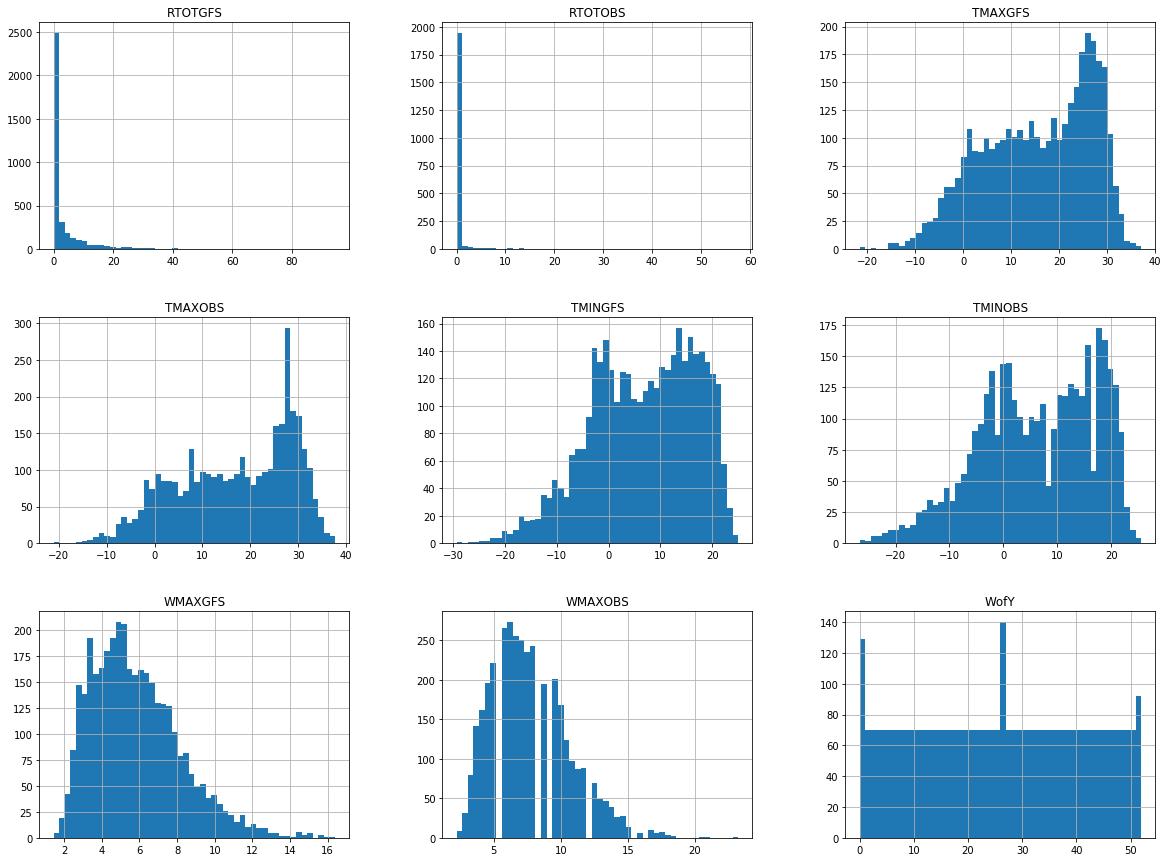

In [9]:
all_daily_data.hist(bins=50, figsize=(20, 15))
plt.show()

### Preprocessing
#### Drop NaN rows

In [10]:
# all_daily_data.set_index(pd.to_datetime(all_daily_data.index).date, inplace=True)
# all_3hr_data.set_index(pd.to_datetime(all_3hr_data.index).date, inplace=True)
# all_data = pd.concat([all_daily_data, all_3hr_data.groupby(all_3hr_data.index).mean()], 
#                      axis=1)
# all_data.describe()

TMAXOBS      TMINOBS      WMAXOBS      RTOTOBS      TMAXGFS  \
count  3626.000000  3626.000000  3628.000000  2040.000000  3613.000000   
mean     16.926672     6.138230     7.672654     0.448922    15.552151   
std      11.939826    10.723779     2.941521     2.894789    11.237922   
min     -21.111111   -26.666667     2.235136     0.000000   -21.660000   
25%       7.222222    -1.666667     5.811354     0.000000     6.640000   
50%      18.888889     6.666667     7.152436     0.000000    17.140000   
75%      27.777778    15.555556     9.387573     0.000000    25.540000   
max      37.777778    25.555556    23.245418    57.600000    37.140000   

           TMINGFS      WMAXGFS      RTOTGFS         WofY         DWPC  ...  \
count  3613.000000  3613.000000  3613.000000  3651.000000  3628.000000  ...   
mean      6.688519     5.833282     3.275851    25.736511     6.789375  ...   
std      10.016658     2.363949     7.164487    15.061541    10.919402  ...   
min     -29.360000     1.431782     0.000000     0.000000   -29.150000  ...   
25%      -0.960000     4.045986     0.000000    13.000000    -1.406094  ...   
50%       7.540000     5.456189     0.270000    26.000000     7.491250  ...   
75%      15.140000     7.244308     3.120000    39.000000    16.391094  ...   
max      25.040000    16.413714    94.690000    52.000000    26.228750  ...   

           UWND700      UWND500      UWND250      UWND100      VWND925  \
count  3628.000000  3628.000000  3628.000000  3628.000000  3628.000000   
mean     19.365362    30.836949    51.637853    32.762221     2.405293   
std      13.905752    20.539691    31.760164    19.812013    13.027114   
min     -33.222578   -41.337419   -43.756546   -23.111137   -40.752567   
25%       9.517211    15.973054    28.305504    17.751041    -7.006174   
50%      19.520066    29.395053    48.742207    30.708671     1.620068   
75%      28.885405    44.141255    72.611700    45.453829    10.885838   
max      58.992637   100.313417   181.545673   120.537188    44.476622   

           VWND850      VWND700      VWND500      VWND250      VWND100  
count  3628.000000  3628.000000  3628.000000  3628.000000  3628.000000  
mean      0.571284    -1.809407    -2.957140    -1.111248    -1.256594  
std      12.430945    13.998946    19.529614    30.775787    12.736670  
min     -45.811223   -52.605270   -79.356966  -113.476749   -64.988212  
25%      -7.849683   -10.780356   -14.830654   -20.169407    -9.087892  
50%      -0.233848    -2.538497    -3.167218    -2.514362    -1.919623  
75%       8.370637     7.074893     7.962542    16.271117     6.180407  
max      56.749685    59.524774    79.055874   120.758065    58.098403  

[8 rows x 49 columns]

In [47]:
all_data = pd.concat([all_daily_data, all_3hr_data_day], 
                     axis=1)
all_data = pd.concat([all_data, all_3hr_data_night], 
                     axis=1)
all_data.shape

(3651, 88)

In [48]:
all_data

TMAXOBS    TMINOBS    WMAXOBS  RTOTOBS  TMAXGFS  TMINGFS  \
2010-01-02 -14.444444 -20.555556   6.705409      0.0   -11.26   -16.46   
2010-01-03 -12.222222 -21.111111   4.917300      0.0   -10.16   -15.96   
2010-01-04 -11.666667 -18.888889   8.940545      0.0    -9.96   -14.36   
2010-01-05 -12.222222 -18.333333   7.152436      NaN    -8.46   -12.86   
2010-01-06  -7.777778 -19.444444   3.576218      0.0    -7.16   -11.06   
...               ...        ...        ...      ...      ...      ...   
2019-12-27   6.111111   0.000000   6.705409      0.0    11.84     3.84   
2019-12-28  13.333333   0.000000  10.281627      0.0    13.94     3.54   
2019-12-29  15.000000   5.000000  10.281627      NaN    15.94     9.34   
2019-12-30   3.333333  -0.555556  11.622709      NaN     7.24    -1.66   
2019-12-31   0.555556  -1.111111  12.963791      0.0    -0.36    -2.26   

              WMAXGFS  RTOTGFS  DWPC_day  HCLD_day  ...  UWND700_night  \
2010-01-02   7.323933     0.05  -17.9950       0.0  ...      23.210843   
2010-01-03   4.687217     0.00  -17.7125      14.5  ...      21.981040   
2010-01-04   5.941380     0.06  -15.4550       2.5  ...       6.036049   
2010-01-05   5.685068     0.17  -13.6925      37.5  ...       6.900037   
2010-01-06   3.794733     0.77  -11.7550       5.5  ...      13.309234   
...               ...      ...       ...       ...  ...            ...   
2019-12-27   4.301163     0.00    1.1375     100.0  ...      31.186234   
2019-12-28   8.819297     2.73    5.1300     100.0  ...      22.523263   
2019-12-29   9.701546    11.58   12.9200      97.5  ...      13.295594   
2019-12-30  11.111256     2.57   -3.3825       0.0  ...      15.908302   
2019-12-31   8.769265     0.04   -5.6850      34.5  ...      39.506189   

            UWND500_night  UWND250_night  UWND100_night  VWND925_night  \
2010-01-02      51.274522      91.381895      54.751208     -19.076241   
2010-01-03      42.448913      67.103289      42.791280     -12.420994   
2010-01-04      21.462281      21.868511      29.855762     -13.565430   
2010-01-05       7.468133      16.414388      31.557358     -17.653823   
2010-01-06      21.595664      44.298473      34.451374     -12.489781   
...                   ...            ...            ...            ...   
2019-12-27      48.946866      80.731543      56.796055       6.511669   
2019-12-28      42.410279      86.182421      46.307335      11.673164   
2019-12-29      26.526944      87.054867      28.830882      31.980315   
2019-12-30      23.946568      51.559832      25.092415      18.091088   
2019-12-31      50.948093      71.919880      42.066443       4.547225   

            VWND850_night  VWND700_night  VWND500_night  VWND250_night  \
2010-01-02     -20.358978     -33.716151     -47.910370     -48.429098   
2010-01-03     -17.664466     -30.934185     -37.813223     -23.276514   
2010-01-04     -13.395233     -18.766125     -28.901290     -12.424459   
2010-01-05     -17.994652     -23.957050     -23.014074      -7.541767   
2010-01-06     -14.619708     -14.014959     -14.943185     -31.663268   
...                   ...            ...            ...            ...   
2019-12-27       9.733053      11.412448      22.317645      45.772580   
2019-12-28      13.991313      20.171283      12.161360      23.508309   
2019-12-29      33.838715      36.201176      47.174248      67.650426   
2019-12-30      16.601064      20.359009      49.950849      77.956581   
2019-12-31      -3.741645      -7.479218      -1.540193      12.484106   

            VWND100_night  
2010-01-02     -18.804144  
2010-01-03      -6.752062  
2010-01-04      -7.442837  
2010-01-05      -8.606079  
2010-01-06     -16.665854  
...                   ...  
2019-12-27      21.079556  
2019-12-28      10.852162  
2019-12-29      10.727524  
2019-12-30      16.301678  
2019-12-31      11.654936  

[3651 rows x 88 columns]

In [49]:
incomplete_all = all_data[all_data.isnull().any(axis=1)]
incomplete_all_num = [len(incomplete_all[incomplete_all[m].isnull()]) for m in list(incomplete_all)]
display(set(zip(list(incomplete_all), incomplete_all_num)))

{('DWPC100_day', 3139),
 ('DWPC100_night', 2988),
 ('DWPC250_day', 63),
 ('DWPC250_night', 27),
 ('DWPC500_day', 39),
 ('DWPC500_night', 23),
 ('DWPC700_day', 38),
 ('DWPC700_night', 23),
 ('DWPC850_day', 38),
 ('DWPC850_night', 23),
 ('DWPC925_day', 38),
 ('DWPC925_night', 23),
 ('DWPC_day', 38),
 ('DWPC_night', 23),
 ('HCLD_day', 38),
 ('HCLD_night', 23),
 ('HGHT100_day', 38),
 ('HGHT100_night', 23),
 ('HGHT250_day', 38),
 ('HGHT250_night', 23),
 ('HGHT500_day', 38),
 ('HGHT500_night', 23),
 ('HGHT700_day', 38),
 ('HGHT700_night', 23),
 ('HGHT850_day', 38),
 ('HGHT850_night', 23),
 ('HGHT925_day', 38),
 ('HGHT925_night', 23),
 ('LCLD_day', 38),
 ('LCLD_night', 23),
 ('MCLD_day', 38),
 ('MCLD_night', 23),
 ('PRCP_day', 38),
 ('PRCP_night', 23),
 ('PRES_day', 38),
 ('PRES_night', 23),
 ('RTOTGFS', 38),
 ('RTOTOBS', 1611),
 ('TMAXGFS', 38),
 ('TMAXOBS', 25),
 ('TMINGFS', 38),
 ('TMINOBS', 25),
 ('TMPC100_day', 38),
 ('TMPC100_night', 23),
 ('TMPC250_day', 38),
 ('TMPC250_night', 23),
 (

In [52]:
all_data = all_data[~all_data["RTOTGFS"].isnull()]
all_data = all_data[~all_data["TMAXOBS"].isnull()]
all_data = all_data[~all_data["WMAXOBS"].isnull()]
all_data = all_data[~all_data["DWPC_day"].isnull()]
all_data = all_data[~all_data["DWPC_night"].isnull()]
all_data = all_data[~all_data["DWPC250_day"].isnull()]
all_data = all_data[~all_data["DWPC250_night"].isnull()]
all_data = all_data[~all_data["DWPC500_day"].isnull()]
# all_data = all_data.fillna(value={"DWPC250":all_data["DWPC250"].mean()})
display(all_data.describe())

preci_data = all_data[~all_data["RTOTOBS"].isnull()]

TMAXOBS      TMINOBS      WMAXOBS      RTOTOBS      TMAXGFS  \
count  3548.000000  3548.000000  3548.000000  1994.000000  3548.000000   
mean     16.960259     6.146029     7.657295     0.452959    15.643692   
std      11.877620    10.676243     2.936525     2.918124    11.175648   
min     -21.111111   -26.111111     2.235136     0.000000   -21.660000   
25%       7.222222    -1.666667     5.811354     0.000000     6.740000   
50%      18.888889     6.666667     7.152436     0.000000    17.190000   
75%      27.222222    15.555556     9.387573     0.000000    25.565000   
max      37.777778    25.555556    23.245418    57.600000    37.140000   

           TMINGFS      WMAXGFS      RTOTGFS     DWPC_day     HCLD_day  ...  \
count  3548.000000  3548.000000  3548.000000  3548.000000  3548.000000  ...   
mean      6.766578     5.826965     3.281266     6.463734   -23.589910  ...   
std       9.963251     2.364841     7.176268    10.991485   387.061673  ...   
min     -26.860000     1.431782     0.000000   -29.587500 -2499.500000  ...   
25%      -0.860000     4.044750     0.000000    -1.693750     0.000000  ...   
50%       7.640000     5.440588     0.270000     7.445000    24.500000  ...   
75%      15.240000     7.218552     3.150000    15.988125    69.000000  ...   
max      25.040000    16.413714    94.690000    26.272500   100.000000  ...   

       UWND700_night  UWND500_night  UWND250_night  UWND100_night  \
count    3548.000000    3548.000000    3548.000000    3548.000000   
mean       19.326147      30.819793      52.167150      33.334866   
std        13.740398      20.501325      31.474423      19.899223   
min       -37.545960     -40.493056     -49.247996     -24.822853   
25%         9.548384      15.903514      29.264061      18.208898   
50%        19.125649      29.103864      49.237769      31.401424   
75%        28.838218      44.104008      72.188059      46.060179   
max        62.235333      98.386869     178.725069     119.349757   

       VWND925_night  VWND850_night  VWND700_night  VWND500_night  \
count    3548.000000    3548.000000    3548.000000    3548.000000   
mean        2.633138       0.995108      -2.046651      -3.325418   
std        13.494243      12.555106      13.708543      19.320691   
min       -37.543062     -46.682673     -50.116989     -80.531768   
25%        -7.153103      -7.692903     -10.883098     -14.536510   
50%         1.715525       0.203061      -2.633677      -3.670303   
75%        11.643368       8.843146       6.330388       7.414022   
max        45.967386      55.239986      58.057087      74.638971   

       VWND250_night  VWND100_night  
count    3548.000000    3548.000000  
mean       -0.925802      -1.657444  
std        30.378419      12.666132  
min      -111.558851     -62.943409  
25%       -19.303324      -9.533895  
50%        -1.831268      -2.478097  
75%        16.636041       5.786689  
max       112.899130      59.136357  

[8 rows x 88 columns]

In [53]:
incomplete_all = all_data[all_data.isnull().any(axis=1)]
incomplete_all_num = [len(incomplete_all[incomplete_all[m].isnull()]) for m in list(incomplete_all)]
display(set(zip(list(incomplete_all), incomplete_all_num)))

{('DWPC100_day', 3056),
 ('DWPC100_night', 2909),
 ('DWPC250_day', 0),
 ('DWPC250_night', 0),
 ('DWPC500_day', 0),
 ('DWPC500_night', 0),
 ('DWPC700_day', 0),
 ('DWPC700_night', 0),
 ('DWPC850_day', 0),
 ('DWPC850_night', 0),
 ('DWPC925_day', 0),
 ('DWPC925_night', 0),
 ('DWPC_day', 0),
 ('DWPC_night', 0),
 ('HCLD_day', 0),
 ('HCLD_night', 0),
 ('HGHT100_day', 0),
 ('HGHT100_night', 0),
 ('HGHT250_day', 0),
 ('HGHT250_night', 0),
 ('HGHT500_day', 0),
 ('HGHT500_night', 0),
 ('HGHT700_day', 0),
 ('HGHT700_night', 0),
 ('HGHT850_day', 0),
 ('HGHT850_night', 0),
 ('HGHT925_day', 0),
 ('HGHT925_night', 0),
 ('LCLD_day', 0),
 ('LCLD_night', 0),
 ('MCLD_day', 0),
 ('MCLD_night', 0),
 ('PRCP_day', 0),
 ('PRCP_night', 0),
 ('PRES_day', 0),
 ('PRES_night', 0),
 ('RTOTGFS', 0),
 ('RTOTOBS', 1554),
 ('TMAXGFS', 0),
 ('TMAXOBS', 0),
 ('TMINGFS', 0),
 ('TMINOBS', 0),
 ('TMPC100_day', 0),
 ('TMPC100_night', 0),
 ('TMPC250_day', 0),
 ('TMPC250_night', 0),
 ('TMPC500_day', 0),
 ('TMPC500_night', 0),
 

In [54]:
all_data.tail()

TMAXOBS   TMINOBS    WMAXOBS  RTOTOBS  TMAXGFS  TMINGFS  \
2019-12-27   6.111111  0.000000   6.705409      0.0    11.84     3.84   
2019-12-28  13.333333  0.000000  10.281627      0.0    13.94     3.54   
2019-12-29  15.000000  5.000000  10.281627      NaN    15.94     9.34   
2019-12-30   3.333333 -0.555556  11.622709      NaN     7.24    -1.66   
2019-12-31   0.555556 -1.111111  12.963791      0.0    -0.36    -2.26   

              WMAXGFS  RTOTGFS  DWPC_day  HCLD_day  ...  UWND700_night  \
2019-12-27   4.301163     0.00    1.1375     100.0  ...      31.186234   
2019-12-28   8.819297     2.73    5.1300     100.0  ...      22.523263   
2019-12-29   9.701546    11.58   12.9200      97.5  ...      13.295594   
2019-12-30  11.111256     2.57   -3.3825       0.0  ...      15.908302   
2019-12-31   8.769265     0.04   -5.6850      34.5  ...      39.506189   

            UWND500_night  UWND250_night  UWND100_night  VWND925_night  \
2019-12-27      48.946866      80.731543      56.796055       6.511669   
2019-12-28      42.410279      86.182421      46.307335      11.673164   
2019-12-29      26.526944      87.054867      28.830882      31.980315   
2019-12-30      23.946568      51.559832      25.092415      18.091088   
2019-12-31      50.948093      71.919880      42.066443       4.547225   

            VWND850_night  VWND700_night  VWND500_night  VWND250_night  \
2019-12-27       9.733053      11.412448      22.317645      45.772580   
2019-12-28      13.991313      20.171283      12.161360      23.508309   
2019-12-29      33.838715      36.201176      47.174248      67.650426   
2019-12-30      16.601064      20.359009      49.950849      77.956581   
2019-12-31      -3.741645      -7.479218      -1.540193      12.484106   

            VWND100_night  
2019-12-27      21.079556  
2019-12-28      10.852162  
2019-12-29      10.727524  
2019-12-30      16.301678  
2019-12-31      11.654936  

[5 rows x 88 columns]

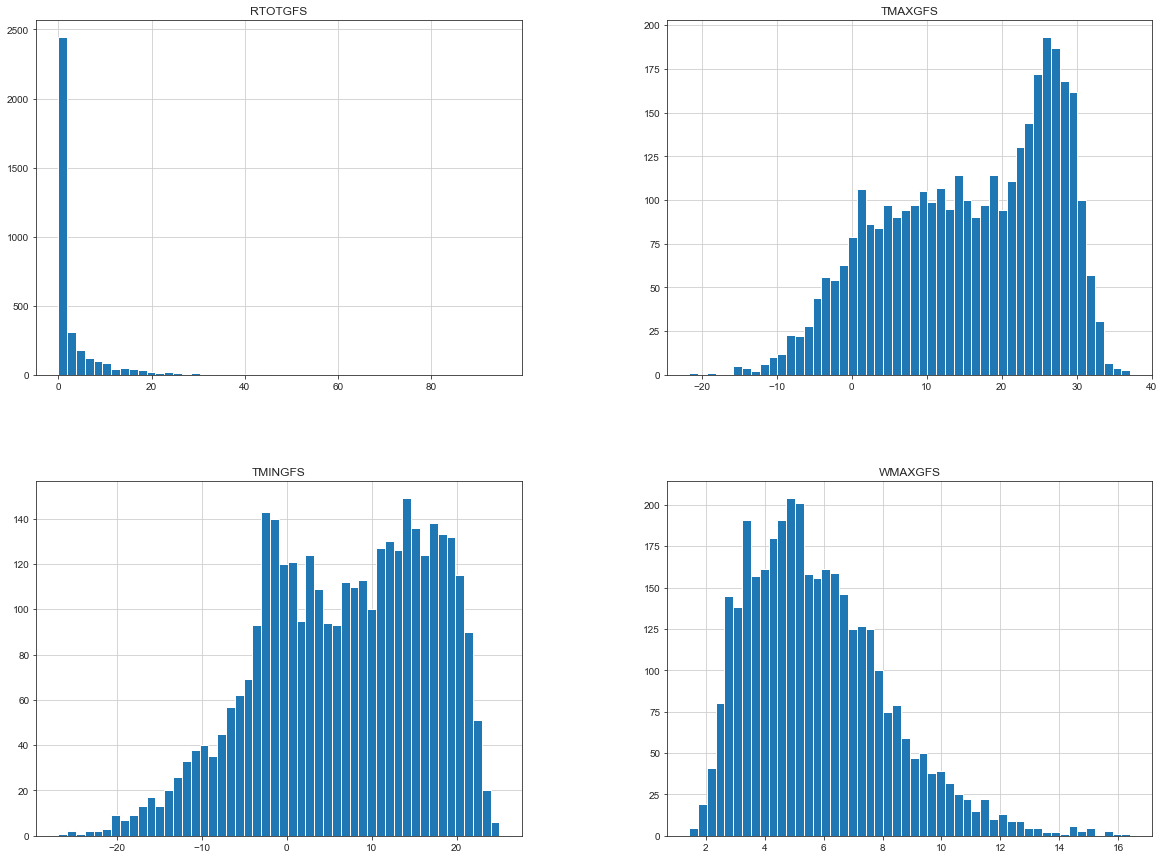

In [108]:
all_data[['TMAXGFS','TMINGFS','WMAXGFS','RTOTGFS']].hist(bins=50, figsize=(20, 15))
all_data.to_csv("all_data_day_night.csv")

## Prediction via regression

In [57]:
predictors = ['TMAXGFS','TMINGFS','WMAXGFS','RTOTGFS','DWPC_day','HCLD_day','LCLD_day','MCLD_day','PRCP_day','PRES_day','TMPC_day','UWND_day','VWND_day','WSPD_day','DWPC925_day','DWPC850_day','DWPC700_day','DWPC500_day','DWPC250_day','HGHT925_day','HGHT850_day','HGHT700_day','HGHT500_day','HGHT250_day','HGHT100_day','TMPC925_day','TMPC850_day','TMPC700_day','TMPC500_day','TMPC250_day','TMPC100_day','UWND925_day','UWND850_day','UWND700_day','UWND500_day','UWND250_day','UWND100_day','VWND925_day','VWND850_day','VWND700_day','VWND500_day','VWND250_day','VWND100_day','DWPC_night','HCLD_night','LCLD_night','MCLD_night','PRCP_night','PRES_night','TMPC_night','UWND_night','VWND_night','WSPD_night','DWPC925_night','DWPC850_night','DWPC700_night','DWPC500_night','DWPC250_night','HGHT925_night','HGHT850_night','HGHT700_night','HGHT500_night','HGHT250_night','HGHT100_night','TMPC925_night','TMPC850_night','TMPC700_night','TMPC500_night','TMPC250_night','TMPC100_night','UWND925_night','UWND850_night','UWND700_night','UWND500_night','UWND250_night','UWND100_night','VWND925_night','VWND850_night','VWND700_night','VWND500_night','VWND250_night','VWND100_night']
train_enddate = pd.to_datetime('2018-12-31').date()
train_startdate = pd.to_datetime('2010-1-2').date()
test_startdate = pd.to_datetime('2019-1-1').date()
test_enddate = pd.to_datetime('2019-12-31').date()

In [74]:
# Define function to apply regression to input dataframes
def reg_predict(x, y, predict, regressor="LR"):
    if regressor=="Ridge":
        model = Ridge(fit_intercept = True, normalize = True)
    elif regressor=="Lasso":
        model = Lasso(fit_intercept = True, normalize = True)
    elif regressor=="ElasticNet":
        model = ElasticNet(fit_intercept = True, normalize = True, l1_ratio=0.1)
    else:
        model = LinearRegression(fit_intercept = True, normalize = True)
    model.fit(x, y)
    train, predict = model.predict(x), model.predict(predict)
    return train, predict

In [95]:
# Get predicted values using training data (_predict) and predicted values for 2019 (_predict19) 
# 2019 predictions will be compared to 2019 observations
Tmax_predict, Tmax_predict19     = reg_predict(all_data[predictors].loc[:train_enddate], 
                                               all_data[['TMAXOBS']].loc[:train_enddate], all_data[predictors].loc[test_startdate:test_enddate], 
                                               "LR")
Tmin_predict, Tmin_predict19     = reg_predict(all_data[predictors].loc[:train_enddate],
                                               all_data[['TMINOBS']].loc[:train_enddate], all_data[predictors].loc[test_startdate:test_enddate], 
                                               "LR")
Wmax_predict, Wmax_predict19     = reg_predict(all_data[predictors].loc[:train_enddate],
                                               all_data[['WMAXOBS']].loc[:train_enddate], all_data[predictors].loc[test_startdate:test_enddate], 
                                               "LR")
Precip_predict, Precip_predict19 = reg_predict(preci_data[predictors].loc[:train_enddate],
                                               preci_data[['RTOTOBS']].loc[:train_enddate], 
                                               preci_data[predictors].loc[test_startdate:test_enddate], 
                                               "Ridge")

In [96]:
from sklearn.metrics import mean_squared_error as mse
Tmax_train_error = mse(Tmax_predict, all_data[['TMAXOBS']].loc[:train_enddate])
Tmax_test_error = mse(Tmax_predict19, all_data[['TMAXOBS']].loc[test_startdate:test_enddate])
display(np.sqrt(Tmax_train_error), np.sqrt(Tmax_test_error))

1.9323802217914636

1.9463419013176828

In [97]:
Tmin_train_error = mse(Tmin_predict, all_data[['TMINOBS']].loc[:train_enddate])
Tmin_test_error = mse(Tmin_predict19, all_data[['TMINOBS']].loc[test_startdate:test_enddate])
display(np.sqrt(Tmin_train_error), np.sqrt(Tmin_test_error))

1.6797982177380666

1.726548390169933

In [98]:
Wmax_train_error = mse(Wmax_predict, all_data[['WMAXOBS']].loc[:train_enddate])
Wmax_test_error = mse(Wmax_predict19, all_data[['WMAXOBS']].loc[test_startdate:test_enddate])
display(np.sqrt(Wmax_train_error), np.sqrt(Wmax_test_error))

1.501516328455627

1.6074137354173228

In [99]:
# Ridge regression can only improve RTOT's estimation
Precip_train_error = mse(Precip_predict, preci_data[['RTOTOBS']].loc[:train_enddate])
Precip_test_error = mse(Precip_predict19, preci_data[['RTOTOBS']].loc[test_startdate:test_enddate])
display(np.sqrt(Precip_train_error), np.sqrt(Precip_test_error))

2.8544776424248575

1.532252242686832

# Random Forest

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost

In [65]:
# Test the XGBoost, not good enough
xgb_reg = xgboost.XGBRegressor(objective = "reg:squarederror")
xgb_reg.fit(all_data[predictors].loc[:train_enddate], all_data[['TMAXOBS']].loc[:train_enddate])
y_pred = xgb_reg.predict(all_data[predictors].loc[test_startdate:test_enddate])
val_error = np.sqrt(mean_squared_error(y_pred, all_data[['TMAXOBS']].loc[test_startdate:test_enddate]))

In [66]:
val_error

2.0798066693864454

In [67]:
# Regression Forest
params = {'min_samples_split': [6, 8, 10], 
          'n_estimators': [1000, 1500, 2000]}

In [68]:
grid_search_cv_TMAX = GridSearchCV(RandomForestRegressor(), \
                             params, verbose = 0, cv = 3)
display(grid_search_cv_TMAX.fit(all_data[predictors].loc[:train_enddate], all_data[['TMAXOBS']].loc[:train_enddate].values.ravel()))
display(grid_search_cv_TMAX.best_estimator_)
y_pred = grid_search_cv_TMAX.predict(all_data[predictors].loc[test_startdate:test_enddate])
display(np.sqrt(mean_squared_error(all_data[['TMAXOBS']].loc[test_startdate:test_enddate], y_pred)))

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

1.9083727303423974

In [69]:
grid_search_cv_TMIN = GridSearchCV(RandomForestRegressor(), \
                             params, verbose = 0, cv = 3)
display(grid_search_cv_TMIN.fit(all_data[predictors].loc[:train_enddate], all_data[['TMINOBS']].loc[:train_enddate].values.ravel()))
display(grid_search_cv_TMIN.best_estimator_)
y_pred = grid_search_cv_TMIN.predict(all_data[predictors].loc[test_startdate:test_enddate])
display(np.sqrt(mean_squared_error(all_data[['TMINOBS']].loc[test_startdate:test_enddate], y_pred)))

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

1.6170590706513521

In [71]:
grid_search_cv_WMAX = GridSearchCV(RandomForestRegressor(), \
                             params, verbose = 0, cv = 3)
display(grid_search_cv_WMAX.fit(all_data[predictors].loc[:train_enddate], all_data[['WMAXOBS']].loc[:train_enddate].values.ravel()))
display(grid_search_cv_WMAX.best_estimator_)
y_pred = grid_search_cv_WMAX.predict(all_data[predictors].loc[test_startdate:test_enddate])
display(np.sqrt(mean_squared_error(all_data[['WMAXOBS']].loc[test_startdate:test_enddate], y_pred)))

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

1.5437603771598492

In [72]:
grid_search_cv_RTOT = GridSearchCV(RandomForestRegressor(), \
                             params, verbose = 0, cv = 3)
display(grid_search_cv_RTOT.fit(preci_data[predictors].loc[:train_enddate], preci_data[['RTOTOBS']].loc[:train_enddate].values.ravel()))
display(grid_search_cv_RTOT.best_estimator_)
y_pred = grid_search_cv_RTOT.predict(preci_data[predictors].loc[test_startdate:test_enddate])
display(np.sqrt(mean_squared_error(preci_data[['RTOTOBS']].loc[test_startdate:test_enddate], y_pred)))

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

1.5849802286590102

In [109]:
grid_search_cv_RTOT.best_estimator_.feature_importances_


array([0.00420864, 0.00092459, 0.01985069, 0.15255862, 0.00092999,
       0.00915173, 0.00883499, 0.03400996, 0.10004616, 0.00528652,
       0.00249822, 0.0101915 , 0.00372683, 0.00373164, 0.00295   ,
       0.02590952, 0.0138558 , 0.07442295, 0.02153844, 0.01172913,
       0.00968766, 0.01516789, 0.00523539, 0.0047286 , 0.00778345,
       0.00462576, 0.00199693, 0.00221222, 0.00638162, 0.01036477,
       0.00983611, 0.00284767, 0.00377413, 0.0069336 , 0.00341914,
       0.00316738, 0.00301251, 0.01062361, 0.00540036, 0.00337777,
       0.00562121, 0.01118835, 0.00410016, 0.00335953, 0.00563406,
       0.0187804 , 0.01216457, 0.02101307, 0.00415512, 0.01541678,
       0.01159243, 0.00174099, 0.01281683, 0.00530039, 0.02451434,
       0.00598489, 0.03040768, 0.00911663, 0.00548377, 0.00918529,
       0.01650237, 0.00892419, 0.02334628, 0.00656118, 0.00496006,
       0.00430618, 0.01428594, 0.01180893, 0.00942649, 0.00970398,
       0.00477546, 0.00230559, 0.00536803, 0.003576  , 0.00347

In [100]:
%matplotlib inline
sns.set_style('ticks')

# Define function to plot actual vs. predicted values
def plot_predict(time, actual, predicted, colors, legendloc, title, ylabel, ymin, ymax):

    plt.figure(figsize=(15,5))
    plt.plot(time, actual, color = colors[0], label = 'Observed')
    plt.plot(time, predicted, color = colors[1], alpha = 0.8, label = 'Predicted')
    # Add dashed vertical line to denote beginning of 2019
    plt.vlines(dt.datetime(2019, 1, 1), ymin, ymax, linestyles = 'dashed', alpha = 0.7)
    plt.legend(loc = legendloc)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Time')
    plt.xlim(time[0]-pd.Timedelta(days=1),  time[-1]+pd.Timedelta(days=1))
    plt.ylim(ymin, ymax)
    plt.show()

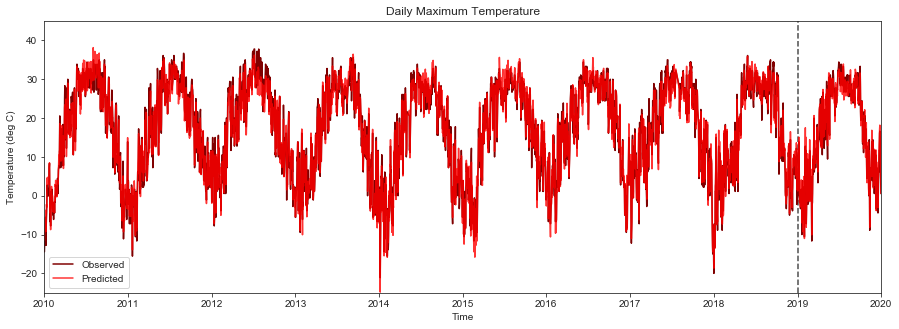

In [101]:
# Plot predicted vs. actual Tmax
Tmax_actual    = all_data['TMAXOBS']
Tmax_predicted = np.concatenate((Tmax_predict, Tmax_predict19))
colors = ['maroon', 'red']
plot_predict(pd.to_datetime(all_data.index), Tmax_actual, Tmax_predicted, colors, legendloc = 'lower left', 
             title = 'Daily Maximum Temperature', ylabel = 'Temperature (deg C)', 
             ymin = -25, ymax = 45)

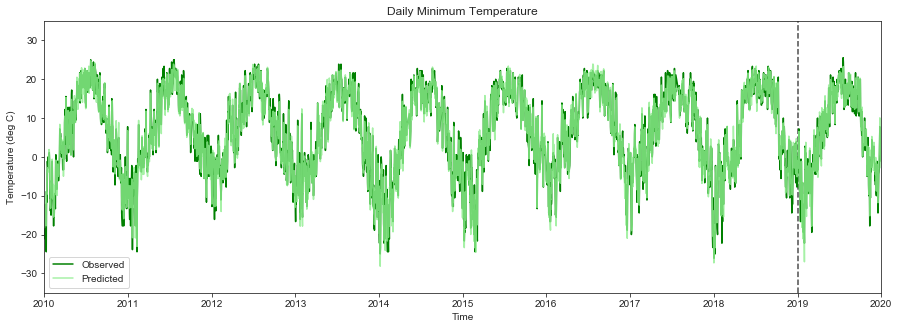

In [104]:
# Plot predicted vs. actual Tmin
Tmin_actual    = all_data['TMINOBS']
Tmin_predicted = np.concatenate((Tmin_predict, Tmin_predict19))
colors = ['green', 'lightgreen']
plot_predict(pd.to_datetime(all_data.index), Tmin_actual, Tmin_predicted, colors, legendloc = 'lower left', 
             title = 'Daily Minimum Temperature', ylabel = 'Temperature (deg C)', 
             ymin = -35, ymax = 35)

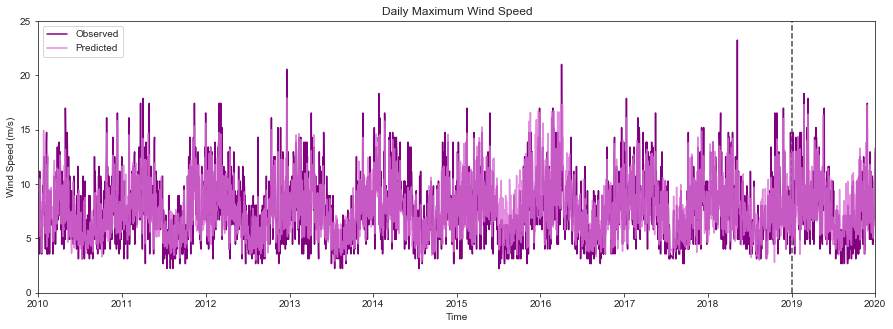

In [105]:
# Plot predicted vs. actual Wmax
Wmax_actual    = all_data['WMAXOBS']
Wmax_predicted = np.concatenate((Wmax_predict, Wmax_predict19))
colors = ['purple', 'orchid']
plot_predict(pd.to_datetime(all_data.index), Wmax_actual, Wmax_predicted, colors, legendloc = 'upper left', 
             title = 'Daily Maximum Wind Speed', ylabel = 'Wind Speed (m/s)', 
             ymin = 0, ymax = 25)

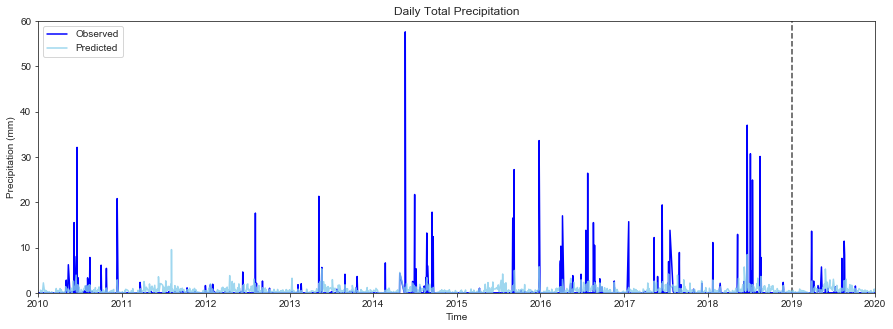

In [107]:
# Plot predicted vs. actual Precip
Precip_actual    = preci_data['RTOTOBS']
Precip_predicted = np.concatenate((Precip_predict, Precip_predict19))
colors = ['blue', 'skyblue']
plot_predict(pd.to_datetime(preci_data.index), Precip_actual, Precip_predicted, colors, legendloc = 'upper left', 
             title = 'Daily Total Precipitation', ylabel = 'Precipitation (mm)', 
             ymin = 0, ymax = 60)

In [0]:
# Define function to compute MSE for all predicted variables
def calc_mse(Tmax_actual, Tmax_predicted, Tmin_actual, Tmin_predicted,
              Wmax_actual, Wmax_predicted, Precip_actual, Precip_predicted):

    # Calculate MSE for each variable using sklearn function
    Tmax_mse   = mean_squared_error(Tmax_actual, Tmax_predicted)
    Tmin_mse   = mean_squared_error(Tmin_actual, Tmin_predicted)
    Wmax_mse   = mean_squared_error(Wmax_actual, Wmax_predicted)
    Precip_mse = mean_squared_error(Precip_actual, Precip_predicted)

    # Total MSE
    total_mse  = Tmax_mse + Tmin_mse + Wmax_mse + Precip_mse

    # Print to user
    print('Tmax error: {0:4.3f}'.format(Tmax_mse))
    print('Tmin error: {0:4.3f}'.format(Tmin_mse)) 
    print('Wmax error: {0:4.3f}'.format(Wmax_mse))
    print('Precip error: {0:4.3f}'.format(Precip_mse))
    print('Total error: {0:4.3f}'.format(total_mse))

In [78]:
calc_mse(Tmax_actual, Tmax_predicted, Tmin_actual, Tmin_predicted,
         Wmax_actual, Wmax_predicted, Precip_actual, Precip_predicted)

Tmax error: 5.222
Tmin error: 4.186
Wmax error: 2.928
Precip error: 6.594
Total error: 18.929
